In [257]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.io import arff

In [258]:
data = arff.loadarff('Dataset/PhishingData.arff')
df = pd.DataFrame(data[0])
df.describe()
total_eff = len(df)

In [261]:
aggs = dict()
for var in df.columns[:-1]:
    var_results = df[[var, 'Result']]
    var_results['Frequency']=1
    var_results_freqs = var_results.groupby([var, 'Result'], as_index=False).agg({'Frequency': 'sum'})
    aggs[var] = var_results_freqs

/tmp/ipykernel_158136/3813648546.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  var_results['Frequency']=1


In [262]:
def generate_result_freqs(result, all_results_freqs, var, labels):
    merge = labels.merge(all_results_freqs[all_results_freqs.Result==result], on=var, how='left')
    return (100*merge.Frequency.fillna(0)/total_eff).apply(lambda x: round(x,2))

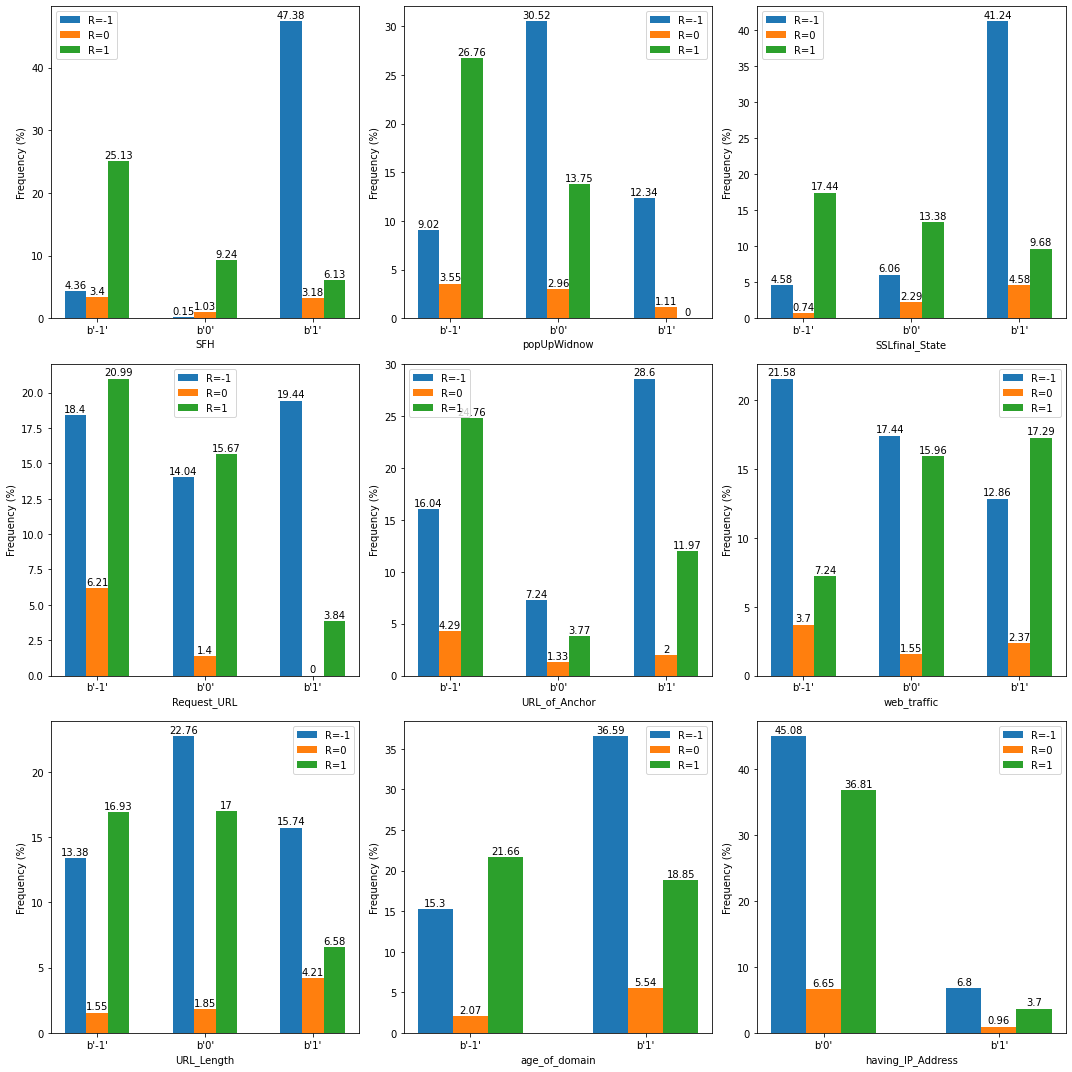

In [284]:
fig, ax = plt.subplots(3,3, figsize=(15, 15))
for i, var in enumerate(aggs):
    var_results_freqs = aggs[var]
    labels = pd.DataFrame(var_results_freqs[var].unique(), columns=[var])
    result_minus_one = generate_result_freqs(b'-1', var_results_freqs, var, labels)
    result_zero = generate_result_freqs(b'0', var_results_freqs, var, labels)
    result_plus_one = generate_result_freqs(b'1', var_results_freqs, var, labels)

    x = np.arange(len(labels))
    width = 0.6
    current_ax = ax[int(i/3)][i%3]
    rects1 = current_ax.bar(x - width/3, result_minus_one, width/3, label='R=-1')
    rects2 = current_ax.bar(x, result_zero, width/3, label='R=0')
    rects3 = current_ax.bar(x + width/3, result_plus_one, width/3, label='R=1')

    current_ax.set_ylabel('Frequency (%)')
    current_ax.set_xlabel(var)
    current_ax.set_xticks(x)
    current_ax.set_xticklabels(labels.apply(lambda x: x[0], axis=1))
    current_ax.legend()

    current_ax.bar_label(rects1, padding=1)
    current_ax.bar_label(rects2, padding=1)
    current_ax.bar_label(rects3, padding=1)

    fig.tight_layout()
#plt.savefig("results_dist_per_var.jpg")
plt.show()